# 🌳 나무의 생존 여부를 판별하는 알고리즘

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
import pyproj
import matplotlib.pyplot as plt

In [ ]:
path = '/content/drive/MyDrive/셩 코딩 연습/data/Tree_Data.csv'

In [ ]:
df = pd.read_csv(path)
df.head()

,No,Plot,Subplot,Species,Light_ISF,Light_Cat,Core,Soil,Adult,Sterile,...,AMF,EMF,Phenolics,Lignin,NSC,Census,Time,Event,Harvest,Alive
0,126,1,C,Acer saccharum,0.106,Med,2017,Prunus serotina,I,Non-Sterile,...,22.00,NaN,-0.56,13.86,12.15,4,14.0,1.0,NaN,NaN
1,11,1,C,Quercus alba,0.106,Med,2017,Quercus rubra,970,Non-Sterile,...,15.82,31.07,5.19,20.52,19.29,33,115.5,0.0,NaN,X
2,12,1,C,Quercus rubra,0.106,Med,2017,Prunus serotina,J,Non-Sterile,...,24.45,28.19,3.36,24.74,15.01,18,63.0,1.0,NaN,NaN
3,2823,7,D,Acer saccharum,0.080,Med,2016,Prunus serotina,J,Non-Sterile,...,22.23,NaN,-0.71,14.29,12.36,4,14.0,1.0,NaN,NaN
4,5679,14,A,Acer saccharum,0.060,Low,2017,Prunus serotina,689,Non-Sterile,...,21.15,NaN,-0.58,10.85,11.20,4,14.0,1.0,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2783 entries, 0 to 2782
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   No           2783 non-null   int64  
 1   Plot         2783 non-null   int64  
 2   Subplot      2783 non-null   object 
 3   Species      2783 non-null   object 
 4   Light_ISF    2783 non-null   float64
 5   Light_Cat    2783 non-null   object 
 6   Core         2783 non-null   int64  
 7   Soil         2783 non-null   object 
 8   Adult        2783 non-null   object 
 9   Sterile      2783 non-null   object 
 10  Conspecific  2783 non-null   object 
 11  Myco         2783 non-null   object 
 12  SoilMyco     2783 non-null   object 
 13  PlantDate    2783 non-null   object 
 14  AMF          2783 non-null   float64
 15  EMF          1283 non-null   float64
 16  Phenolics    2783 non-null   float64
 17  Lignin       2783 non-null   float64
 18  NSC          2783 non-null   float64
 19  Census

In [ ]:
df.isnull().sum()

No                0
Plot              0
Subplot           0
Species           0
Light_ISF         0
Light_Cat         0
Core              0
Soil              0
Adult             0
Sterile           0
Conspecific       0
Myco              0
SoilMyco          0
PlantDate         0
AMF               0
EMF            1500
Phenolics         0
Lignin            0
NSC               0
Census            0
Time              0
Event             1
Harvest        2079
Alive          2292
dtype: int64


- Light_ISF : 빛 단위(%)
- Adult : (식물의)성체
- Sterile : 살균, 무균 유무
- Conspecific : 동종
  - Heterospecific 이종
  - Sterilized 멸균
- Myco : 균근(식물이 추가적인 수분과 영양분 얻게끔 도와줌)
- Phenolics : 페놀성 화합물

- Census : 인구조사
- Harvest : 수확
- Event : 1 -> 사망


## EDA

In [ ]:
#라벨 인코딩 해줄거임 (걍 카테고리화 시켜줄려고)
#from sklearn.preprocessing import LabelEncoder
#le = LabelEncoder()
#le.fit_transform(df['Subplot'])

In [ ]:
df['PlantDate'] = df['PlantDate'].astype('str')
df.info

<bound method DataFrame.info of         No  Plot Subplot          Species  Light_ISF Light_Cat  Core  \
0      126     1       C   Acer saccharum      0.106       Med  2017   
1       11     1       C     Quercus alba      0.106       Med  2017   
2       12     1       C    Quercus rubra      0.106       Med  2017   
3     2823     7       D   Acer saccharum      0.080       Med  2016   
4     5679    14       A   Acer saccharum      0.060       Low  2017   
...    ...   ...     ...              ...        ...       ...   ...   
2778  7165    17       B  Prunus serotina      0.111       Med  2017   
2779  7217    17       D     Quercus alba      0.118       Med  2017   
2780  7306    17       D     Quercus alba      0.118       Med  2017   
2781  7771    18       D     Quercus alba      0.161      High  2017   
2782  7401    18       A  Prunus serotina      0.141      High  2016   

                       Soil Adult      Sterile  ...    AMF    EMF Phenolics  \
0           Prunus serot

In [ ]:
df['PlantDate'] = pd.to_datetime(df['PlantDate'])
df.head()

,No,Plot,Subplot,Species,Light_ISF,Light_Cat,Core,Soil,Adult,Sterile,...,AMF,EMF,Phenolics,Lignin,NSC,Census,Time,Event,Harvest,Alive
0,126,1,C,Acer saccharum,0.106,Med,2017,Prunus serotina,I,Non-Sterile,...,22.00,NaN,-0.56,13.86,12.15,4,14.0,1.0,NaN,NaN
1,11,1,C,Quercus alba,0.106,Med,2017,Quercus rubra,970,Non-Sterile,...,15.82,31.07,5.19,20.52,19.29,33,115.5,0.0,NaN,X
2,12,1,C,Quercus rubra,0.106,Med,2017,Prunus serotina,J,Non-Sterile,...,24.45,28.19,3.36,24.74,15.01,18,63.0,1.0,NaN,NaN
3,2823,7,D,Acer saccharum,0.080,Med,2016,Prunus serotina,J,Non-Sterile,...,22.23,NaN,-0.71,14.29,12.36,4,14.0,1.0,NaN,NaN
4,5679,14,A,Acer saccharum,0.060,Low,2017,Prunus serotina,689,Non-Sterile,...,21.15,NaN,-0.58,10.85,11.20,4,14.0,1.0,NaN,NaN


In [ ]:
df['PlantDate'] = df['PlantDate'].apply(lambda X:X.strftime('%Y%m%d'))
df['PlantDate'] = df['PlantDate'].astype(int)

In [ ]:
#df['Phenolics'] = df['Phenolics'].apply(np.ceil)
#df['Lignin'] = df['Lignin'].apply(np.ceil)
#df['Time'] = df['Time'].apply(np.ceil)
#df['Event'] = df['Event'].apply(np.ceil)
#df.head(3)

#ceil : 소수점 자리 올림하여 소수점 없앰
#round : 1째자리까지 반올림
#floor : 소수점 자리 내림하여 없앰

In [ ]:
df.isnull().sum()

#Harvest는 결측치가 너무 많아서 EMF(균근) 결측치만 채워줄거임.

No                0
Plot              0
Subplot           0
Species           0
Light_ISF         0
Light_Cat         0
Core              0
Soil              0
Adult             0
Sterile           0
Conspecific       0
Myco              0
SoilMyco          0
PlantDate         0
AMF               0
EMF            1500
Phenolics         0
Lignin            0
NSC               0
Census            0
Time              0
Event             1
Harvest        2079
Alive          2292
dtype: int64

In [ ]:
#이벤트에 결측값이 있어 상관계수 계산
df.corrwith(df['Event'])

#Myco와 가장 연관성 뛰어남 -> Myco 를 보고 Event 채우려 했으니 0과 1 데이터여서 (동일값 1000개)
#두번째로 높은 Phenolics 를 보고 채우기

<ipython-input-881-cc4ac5e9b0a3>:2: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corrwith(df['Event'])


No          -0.070230
Plot        -0.070711
Light_ISF   -0.048473
Core        -0.052738
PlantDate    0.544326
AMF          0.134544
EMF         -0.037480
Phenolics   -0.575633
Lignin      -0.519645
NSC         -0.410076
Census      -0.232227
Time        -0.232227
Event        1.000000
dtype: float64

In [ ]:
df[df['Event'].isnull()]

#Phenolics = 4.28 확인

,No,Plot,Subplot,Species,Light_ISF,Light_Cat,Core,Soil,Adult,Sterile,...,AMF,EMF,Phenolics,Lignin,NSC,Census,Time,Event,Harvest,Alive
2781,7771,18,D,Quercus alba,0.161,High,2017,Sterile,1297,Sterile,...,16.99,22.51,4.28,19.38,21.36,33,115.5,NaN,NaN,NaN


In [ ]:
df[df['Phenolics'] == 4.28]

#데이터 2개가 Event = 0 임을 확인

,No,Plot,Subplot,Species,Light_ISF,Light_Cat,Core,Soil,Adult,Sterile,...,AMF,EMF,Phenolics,Lignin,NSC,Census,Time,Event,Harvest,Alive
974,5159,12,D,Quercus alba,0.032,Low,2017,Quercus alba,1297,Non-Sterile,...,25.53,34.15,4.28,23.46,16.31,7,24.5,0.0,X,NaN
1239,6785,16,D,Quercus alba,0.133,High,2017,Sterile,1297,Sterile,...,2.00,0.00,4.28,22.87,16.83,7,24.5,0.0,X,NaN
2781,7771,18,D,Quercus alba,0.161,High,2017,Sterile,1297,Sterile,...,16.99,22.51,4.28,19.38,21.36,33,115.5,NaN,NaN,NaN


In [ ]:
df['Event'] = df['Event'].fillna(0)
df.isnull().sum()

No                0
Plot              0
Subplot           0
Species           0
Light_ISF         0
Light_Cat         0
Core              0
Soil              0
Adult             0
Sterile           0
Conspecific       0
Myco              0
SoilMyco          0
PlantDate         0
AMF               0
EMF            1500
Phenolics         0
Lignin            0
NSC               0
Census            0
Time              0
Event             0
Harvest        2079
Alive          2292
dtype: int64

In [ ]:
#이벤트가 1일 때 사망 -> Alive -> 0
df.loc[df['Event'] == 1, 'Alive'] = 0
df.loc[df['Event'] == 0, 'Alive'] = 1
df.head(3)

,No,Plot,Subplot,Species,Light_ISF,Light_Cat,Core,Soil,Adult,Sterile,...,AMF,EMF,Phenolics,Lignin,NSC,Census,Time,Event,Harvest,Alive
0,126,1,C,Acer saccharum,0.106,Med,2017,Prunus serotina,I,Non-Sterile,...,22.00,NaN,-0.56,13.86,12.15,4,14.0,1.0,NaN,0
1,11,1,C,Quercus alba,0.106,Med,2017,Quercus rubra,970,Non-Sterile,...,15.82,31.07,5.19,20.52,19.29,33,115.5,0.0,NaN,1
2,12,1,C,Quercus rubra,0.106,Med,2017,Prunus serotina,J,Non-Sterile,...,24.45,28.19,3.36,24.74,15.01,18,63.0,1.0,NaN,0


In [ ]:
#X(산 식물) -> 1 로 변경
df = df.replace('X', 1)
df.head(3)

,No,Plot,Subplot,Species,Light_ISF,Light_Cat,Core,Soil,Adult,Sterile,...,AMF,EMF,Phenolics,Lignin,NSC,Census,Time,Event,Harvest,Alive
0,126,1,C,Acer saccharum,0.106,Med,2017,Prunus serotina,I,Non-Sterile,...,22.00,NaN,-0.56,13.86,12.15,4,14.0,1.0,NaN,0
1,11,1,C,Quercus alba,0.106,Med,2017,Quercus rubra,970,Non-Sterile,...,15.82,31.07,5.19,20.52,19.29,33,115.5,0.0,NaN,1
2,12,1,C,Quercus rubra,0.106,Med,2017,Prunus serotina,J,Non-Sterile,...,24.45,28.19,3.36,24.74,15.01,18,63.0,1.0,NaN,0


In [ ]:
#안쓰는 컬럼들 없애줄거임 필요없으니깐
columns_to_drop = ['No', 'Plot', 'Subplot', 'Adult','Core', 'Event', 'Harvest']
df = df.drop(columns = columns_to_drop)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2783 entries, 0 to 2782
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Species      2783 non-null   object 
 1   Light_ISF    2783 non-null   float64
 2   Light_Cat    2783 non-null   object 
 3   Soil         2783 non-null   object 
 4   Sterile      2783 non-null   object 
 5   Conspecific  2783 non-null   object 
 6   Myco         2783 non-null   object 
 7   SoilMyco     2783 non-null   object 
 8   PlantDate    2783 non-null   int64  
 9   AMF          2783 non-null   float64
 10  EMF          1283 non-null   float64
 11  Phenolics    2783 non-null   float64
 12  Lignin       2783 non-null   float64
 13  NSC          2783 non-null   float64
 14  Census       2783 non-null   int64  
 15  Time         2783 non-null   float64
 16  Alive        2783 non-null   int64  
dtypes: float64(7), int64(3), object(7)
memory usage: 369.7+ KB


## 🍇EMF NaN 값 채워주기

In [ ]:
from sklearn.pipeline import make_pipeline
from category_encoders import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from ipywidgets import interact
from catboost import CatBoostClassifier, CatBoostRegressor
from sklearn.metrics import mean_squared_error
import catboost
from sklearn.metrics import accuracy_score

In [ ]:
#카테고리화
category_columns = ['Species', 'Light_ISF', 'Light_Cat','Soil','Sterile','Conspecific','Myco','SoilMyco','PlantDate','Alive']
df[category_columns] = df[category_columns].astype('category')

In [ ]:
df[category_columns] = df[category_columns].apply(lambda x : x.cat.codes)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2783 entries, 0 to 2782
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Species      2783 non-null   int8   
 1   Light_ISF    2783 non-null   int8   
 2   Light_Cat    2783 non-null   int8   
 3   Soil         2783 non-null   int8   
 4   Sterile      2783 non-null   int8   
 5   Conspecific  2783 non-null   int8   
 6   Myco         2783 non-null   int8   
 7   SoilMyco     2783 non-null   int8   
 8   PlantDate    2783 non-null   int8   
 9   AMF          2783 non-null   float64
 10  EMF          1283 non-null   float64
 11  Phenolics    2783 non-null   float64
 12  Lignin       2783 non-null   float64
 13  NSC          2783 non-null   float64
 14  Census       2783 non-null   int64  
 15  Time         2783 non-null   float64
 16  Alive        2783 non-null   int8   
dtypes: float64(6), int64(1), int8(10)
memory usage: 179.5 KB


** 람다 🐿️**

: 인공지능 분야나 설계 프로그램에서 쓰이는 언어에서 파생
  함수를 닥 한 줄만으로 만들게 해주는 훌륭한 녀썩

      lambda 매개변수 : 표현식


In [ ]:
#특정 컬럼으로 subset 만들기
df_clean = df.dropna(subset=['EMF'])
df_clean.head()

,Species,Light_ISF,Light_Cat,Soil,Sterile,Conspecific,Myco,SoilMyco,PlantDate,AMF,EMF,Phenolics,Lignin,NSC,Census,Time,Alive
1,2,40,2,5,0,1,1,1,6,15.82,31.07,5.19,20.52,19.29,33,115.5,1
2,3,40,2,3,0,1,1,0,9,24.45,28.19,3.36,24.74,15.01,18,63.0,0
6,2,42,2,2,0,1,1,1,6,24.00,20.00,5.11,18.82,22.51,7,24.5,1
7,3,42,2,6,1,2,1,2,4,4.00,0.00,3.43,25.22,14.81,7,24.5,1
8,3,42,2,1,0,1,1,0,7,28.74,36.18,3.83,26.65,14.65,33,115.5,1


#### ✅ 사이킷런 프리 프로세싱 train-test split
#### ✅ CatboostRegressor



In [ ]:
X = df_clean.drop('EMF', axis = 1)     #feature 데이터 셋(train data)
y = df_clean['EMF']                    #target 데이터 셋(target data)


categorical_columns = ['Species', 'Light_ISF', 'Light_Cat','Soil','Sterile','Conspecific','PlantDate','Alive']
X[categorical_columns] = X[categorical_columns].astype(str)

#학습/테스트 데이터 세트 분리 (보통 0.8:0,2 or 0.7:0.3 정도의 비율)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 121)  #일관되게 나타나게 하기 위한 지표


catboost_model = CatBoostRegressor(iterations=1000, depth=6, learning_rate=0.1, loss_function='RMSE', cat_features=categorical_columns)

catboost_model.fit(X_train, y_train, eval_set=(X_test, y_test), early_stopping_rounds= 50, verbose = 100)   #과적합 방지
                                                                                                            #verbose : 상세정보 출력 여부

y_pred = catboost_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squred Error : {mse}')

0:	learn: 15.8282277	test: 17.4495323	best: 17.4495323 (0)	total: 5.85ms	remaining: 5.85s
100:	learn: 9.5240098	test: 13.2790609	best: 13.2696682 (98)	total: 874ms	remaining: 7.78s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 13.14562968
bestIteration = 135

Shrink model to first 136 iterations.
Mean Squred Error : 172.80757994423257


### 🍊 성능 측정 지표

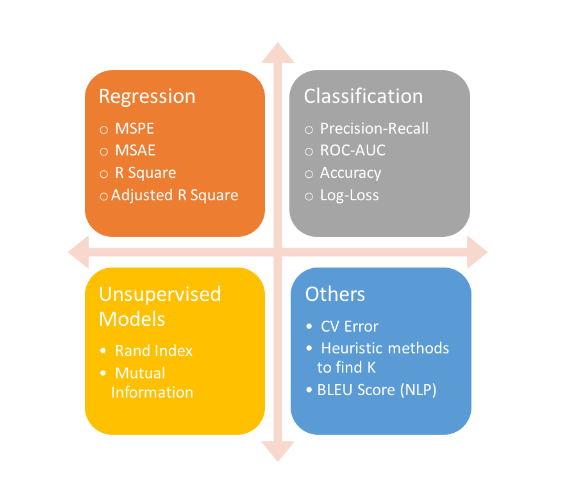

1. MAE (Mean Absolute Error)
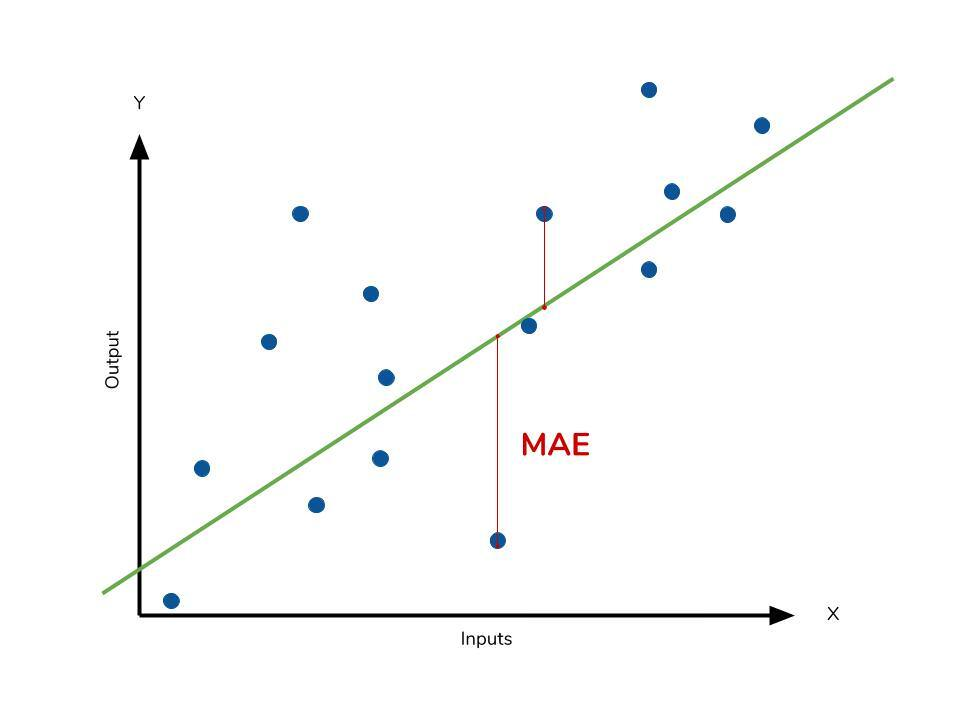
- 실제 값과 예측 값의 차이(error)를 절대값으로 변환해 평균화
- MAE 는 에러에 절대값을 취하기 때문에 에러의 크기 그대로 반영
  -> 예측 결과물의 에러가 10이 나온것이 5로 나온 것 보다 2배가 나쁜 도메인에서 쓰기 적합
- 이상치가 많을 때
      from sklearn.metrics import mean_absolute_error
      mean_absolute_error(y_test, y_pred)


2. MSE (Mean Squared Error)
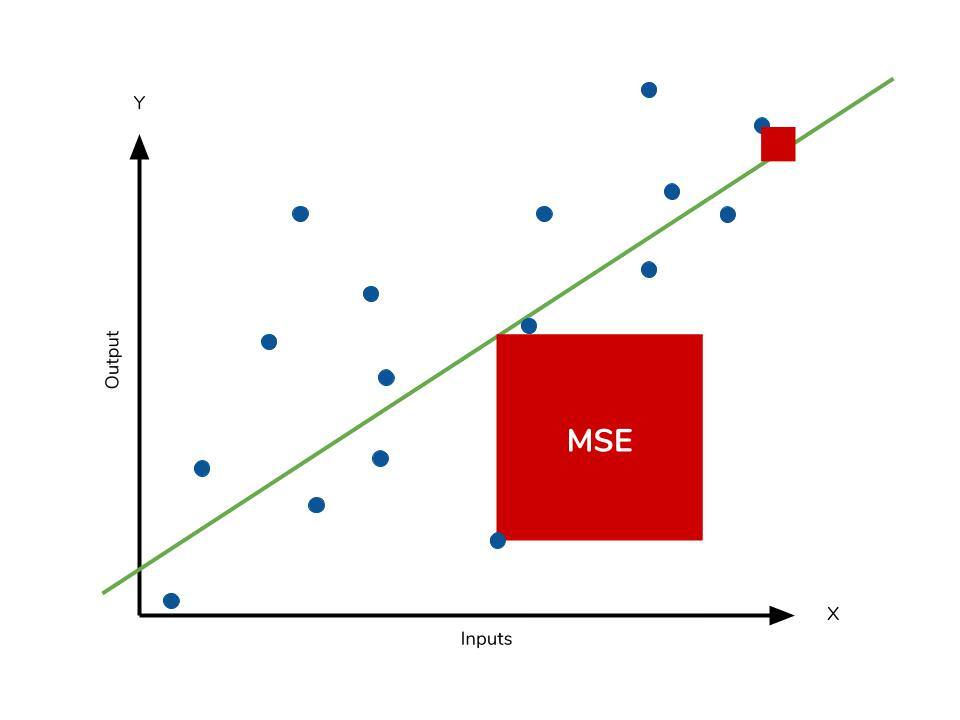
- 실제값과 예측값의 차이를 제곱해 평균화
- 예측값과 실제값 차이의 면적의 합
- 특이값이 존재하면 수치가 많이 늘어남
      from sklearn.metrics import mean_squared_error
      mean_squared_error(y_test, y_pred)


3. RMSE (Root Mean Squared Error)
- MSE 같은 오류의 제곱을 구하므로 실제 오류 평균보다 더 커지는 특성이 있어 MSE에 루트를 씌운 RMSE 값을 씀
- 에러에 제곱을 하기 때문에 에러가 크면 클수록 그에 따른 가중치 높게 반영
  -> 예측 결과물의 에러가 10이 나온 것이 5로 나온것 보다 정확히 2^2(4)배가 나쁜 도메인에서 쓰기 적합한 산식
- 에러에 따른 손실이 기하 급수적으로 올라가는 상황에서 쓰기 적합
        from sklearn.metrics import mean_squared_error
        MSE = mean_squared_error(y_test, y_pred)
        np.sqrt(MSE)


4. MSLE (Mean Squared Log Error)
- MSE에 로그를 적용해준 지표
        from sklearn.metrics import mean_squared_log_error
        mean_squared_log_error(y_test, y_pred)


5. MAPE (Mean Absolute Percentage Error)
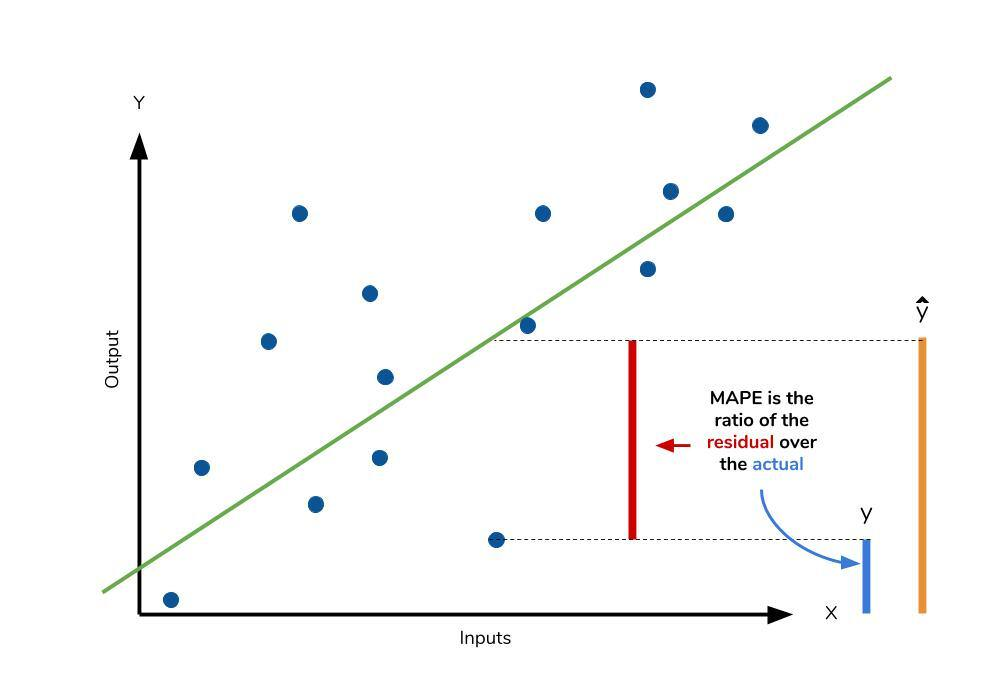
- MAE를 퍼센트로 변환
- MAE 와 같은 단점
- 모델에 대한 평향이 존재
        def MAPE(y_test, y_pred):
	        return np.mean(np.abs((y_test - y_pred) / y_test)) * 100

        MAPE(y_test, y_pred)


6. MPE (Mean Percentage Error)
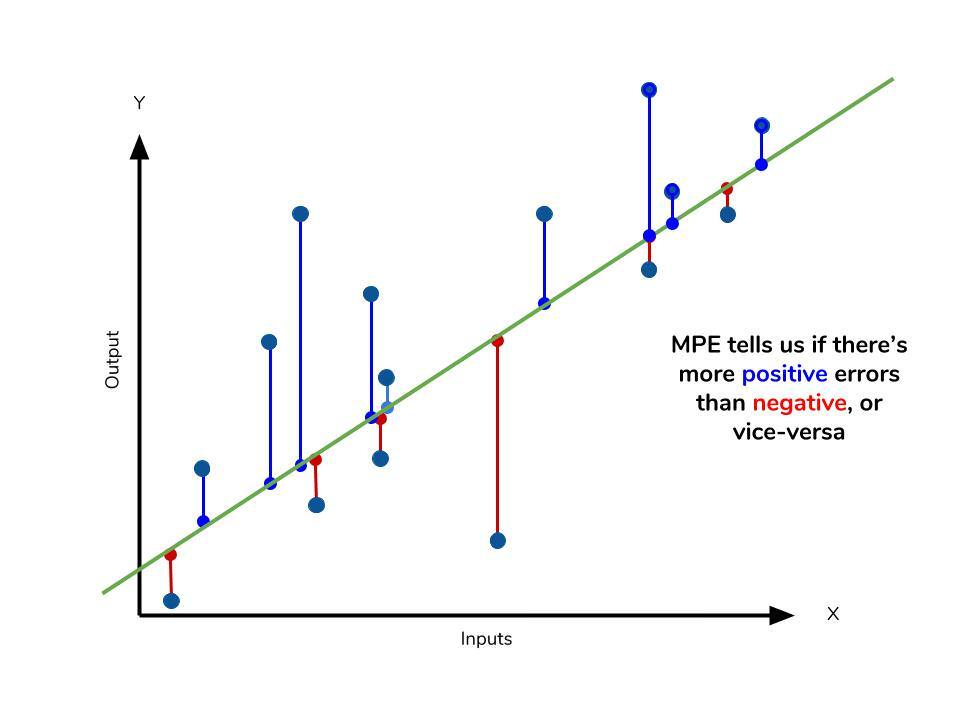
- MAPE 에서 절대값을 제외한 지표
- 모델이 underperformance(+) 인지, overperformance(-) 인지 판단
        def MAE(y_test, y_pred):
	        return np.mean((y_test - y_pred) / y_test) * 100)
    
        MAE(y_test, y_pred)


-------

In [ ]:
#feature의 값이 null 인 경우의 인덱스 찾기
empty_emf_indices = df[df['EMF'].isnull()].index
empty_emf_indices

Int64Index([   0,    3,    4,    5,    9,   18,   19,   20,   21,   27,
            ...
            2759, 2760, 2761, 2762, 2765, 2772, 2774, 2776, 2778, 2782],
           dtype='int64', length=1500)

In [ ]:
catboost_model.predict(df.loc[empty_emf_indices, X.columns])

array([16.70469086, 15.88908243, 11.6637668 , ..., 28.74622063,
       14.48030728, 31.08467942])

In [ ]:
#예측된 EMF 값 넣어주기
df.loc[empty_emf_indices, 'EMF'] = catboost_model.predict(df.loc[empty_emf_indices, X.columns])

### 🍃 Alive 값 예측하기

In [ ]:
X = df.drop('Alive', axis = 1)
y = df['Alive']

X = X.astype(str)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

catboost_model = CatBoostClassifier(iterations=400, depth=6, learning_rate=0.01, verbose=200, loss_function='Logloss', eval_metric='Accuracy')
catboost_model.fit(X_train, y_train, cat_features=X.columns.tolist())


y_pred = catboost_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'정확도: {accuracy :.4f}')

0:	learn: 0.9442947	total: 27.4ms	remaining: 10.9s
200:	learn: 0.9847260	total: 5.17s	remaining: 5.12s
399:	learn: 0.9892183	total: 7.84s	remaining: 0us
정확도: 0.9910


In [ ]:
all_data_pred = catboost_model.predict(X.astype(str))
df['Predicted_Alive'] = all_data_pred
df.head()

,Species,Light_ISF,Light_Cat,Soil,Sterile,Conspecific,Myco,SoilMyco,PlantDate,AMF,EMF,Phenolics,Lignin,NSC,Census,Time,Alive,Predicted_Alive
0,0,40,2,3,0,1,0,0,16,22.00,16.704691,-0.56,13.86,12.15,4,14.0,0,0
1,2,40,2,5,0,1,1,1,6,15.82,31.070000,5.19,20.52,19.29,33,115.5,1,1
2,3,40,2,3,0,1,1,0,9,24.45,28.190000,3.36,24.74,15.01,18,63.0,0,0
3,0,24,2,3,0,1,0,0,16,22.23,15.889082,-0.71,14.29,12.36,4,14.0,0,0
4,0,9,1,3,0,1,0,0,16,21.15,11.663767,-0.58,10.85,11.20,4,14.0,0,0


#### 시각화

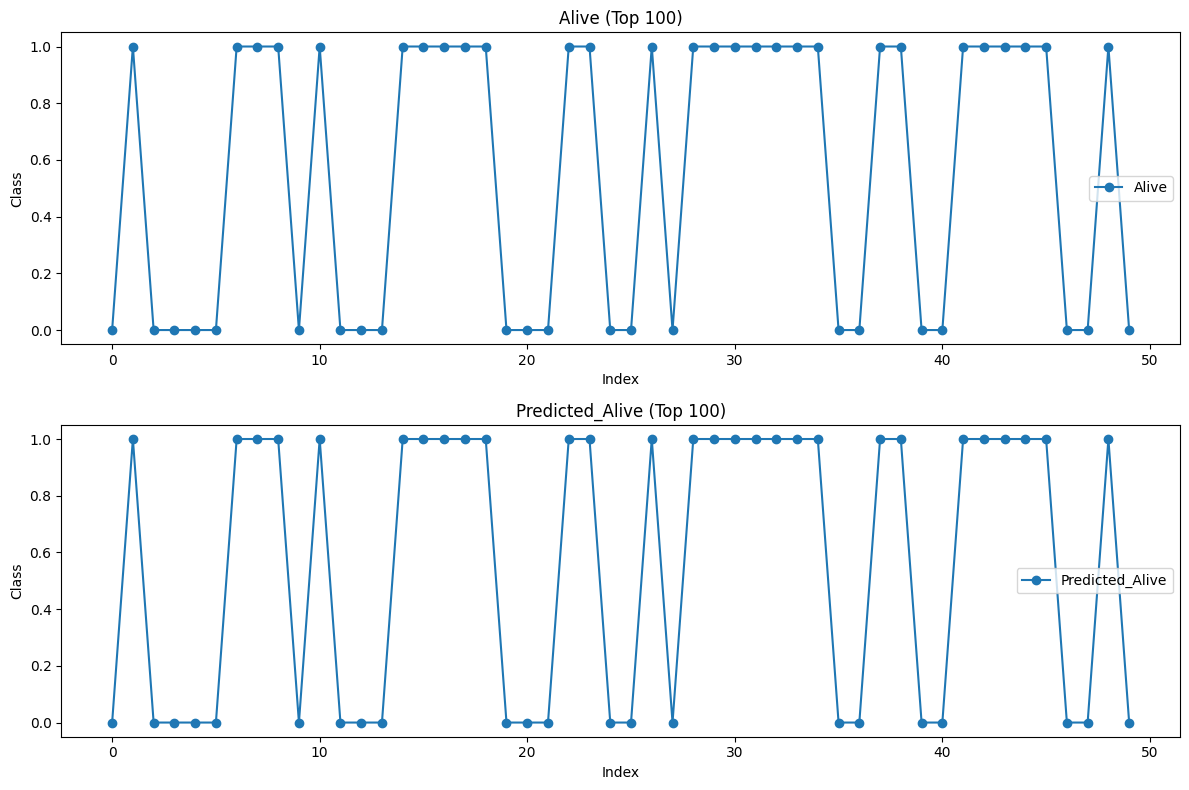

In [ ]:
top_n_df = df.head(50)

plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
plt.plot(top_n_df.index, top_n_df['Alive'], label='Alive', marker='o')
plt.title("Alive (Top 100)")
plt.xlabel("Index")
plt.ylabel("Class")
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(top_n_df.index, top_n_df['Predicted_Alive'], label='Predicted_Alive', marker='o')
plt.title("Predicted_Alive (Top 100)")
plt.xlabel("Index")
plt.ylabel("Class")
plt.legend()

plt.tight_layout()
plt.show()

## 정규화와 표준화
- 정규화 : -1~1 사이 값으로 변환
- 표준화 : 평균이 0 이고 표준편차가 1인 값으로 변환

In [ ]:
def normalize(x):
    return(x-x.min())/(x-max()-x.min())

In [ ]:
def standardscaler(x):
    return(x-x.mean())/x.std

#std : 표준화


In [ ]:
# 정규화와 표준화 같은 경우 패키지로도 잘 나와있기 때문에 위처럼 정의해도 정의 해도 되고, 패키지를 써도 됨

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(X_train[['Phenolics']])
train_Phenolics = ss.transform(X_train[['Phenolics']])
test_Phenolics = ss.transform(X_test[['Phenolics']])

In [ ]:
X_train['Phenolics2'] = train_Phenolics
X_test['Phenolics2'] = test_Phenolics

In [ ]:
X_train.head()

,Species,Light_ISF,Light_Cat,Soil,Sterile,Conspecific,Myco,SoilMyco,PlantDate,AMF,EMF,Phenolics,Lignin,NSC,Census,Time,Phenolics2
889,0,2,1,3,0,1,0,0,15,39.02,10.202471610946972,-1.2,8.78,9.56,7,24.5,-1.598033
1711,1,25,2,0,0,1,0,0,12,20.45,21.81581567086161,0.3,10.69,13.27,12,42.0,-0.832981
100,3,38,2,1,0,1,1,0,8,30.44,39.07,3.8,26.44,14.81,7,24.5,0.952140
315,2,24,2,2,0,1,1,1,7,15.97,20.2,4.82,18.18,21.73,33,115.5,1.472376
2610,3,44,2,5,0,0,1,1,5,17.78,49.61,3.97,21.92,17.54,33,115.5,1.038846


# 머신러닝 🤖
### 로지스틱

In [ ]:
#model
pipe = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(),
    RandomForestClassifier(random_state = 1, n_jobs= -1)      #n_jobs=-1 : 계산이 컴퓨터의 모든 CPU에 전달된다
)

dist = {
    'simpleimputer_strategt' : ['mean', 'median'],
    'ranmomforestclassifier_n_estimators' : [200, 500],   #결정트리의 개수 지정 default = 10 (트리개수 늘리면 시간 오래걸림)
    'randomforestclassifier_max_features' : ['auto', 'sqrt', 'log2'],   #최적의 분할을 위해 고려할 최대 피처 개수
    'randomforestclassifier_max_depth' : [4,5,6,7,8],   #트리의 최대 깊이 default = None
    'ranmomforestclassifier_criterion' : ['gini', 'entropy']
}

In [ ]:
#optimizer
clf = RandomizedSearchCV(
    pipe,
    param_distributions = dist,
    n_iter = 20,    #반복 횟수
    cv = 3,   #폴드 수(접는 횟수)
    scoring = 'accuracy',   #예측 성능 평가 지표 (accuracy, top_k_accuaracy)
    verbose = 1,    #상세 정보 출력 여부  (0 출력, 1 자세히, 2 간략히)
    n_jobs = -1, #cpu 코어 수 -1 입력시 최대로 사용
)

#opimization result
clf.fit(X_train, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


ValueError: ignored